In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Učitavanje podataka iz Iris skupa

In [44]:
data = datasets.load_iris()

columns = np.array(data.feature_names) # Nazivi atributa
X = data.data # Atributi
y = data.target # Ciljna promenljiva / oznaka klase

Opciono: Priprema za konstrukciju Pandas DataFrame-a

In [45]:
data_values = np.concatenate((X, y.reshape((y.shape[0], 1))), axis=1)
iris_df = pd.DataFrame(data=data_values, columns=[col for col in columns] + ['class'])

In [46]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Primer raspodele atributa prema klasama

sepal length (cm)


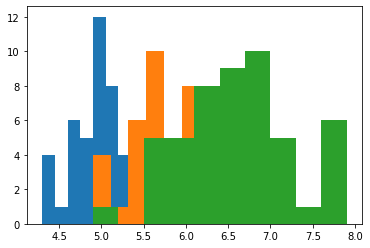

sepal width (cm)


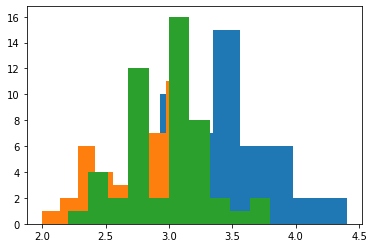

petal length (cm)


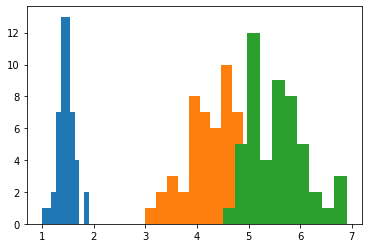

petal width (cm)


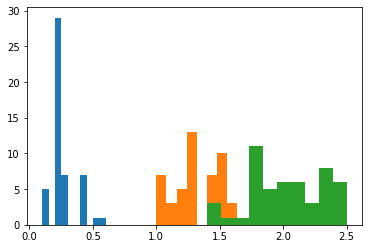

In [13]:
for attribute_index in range(X.shape[1]):
    for class_label in set(y):
        plt.hist(X[y == class_label, attribute_index])
    print(columns[attribute_index])
    plt.show()

Analiza varijanse (disperzije) vrednosti atributa, ispis sortiran opadajuci po vrednosti varijanse

In [30]:
sorted_vars = sorted(zip(columns, X.var(axis=0)), key=lambda x:x[1], reverse=True)
for el in sorted_vars:
    print(f'{el[0]}: {el[1]}')

petal length (cm): 3.0955026666666674
sepal length (cm): 0.6811222222222222
petal width (cm): 0.5771328888888888
sepal width (cm): 0.1887128888888887


## Eliminacija atributa sa varijansom ispod zadatog praga

In [31]:
from sklearn.feature_selection import VarianceThreshold

In [50]:
vt = VarianceThreshold(threshold=0.2) # Eliminisanje attributa sa varijansom manjom od 0.2
X_vt = vt.fit_transform(X)

In [51]:
# Izdvajanje indeksa odabranih atributa
selected_attributes = columns[vt.get_support()]
print(selected_attributes)

['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']


## PCA - Principal Component Analysis

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA()
X_pca = pca.fit_transform(X)

Udeo objašnjene varijanse po koordinatama

In [64]:
explained_vars = zip([f'PC{i+1}' for i in range(pca.explained_variance_ratio_.shape[0])], pca.explained_variance_ratio_)
for el in explained_vars:
    print(f'{el[0]}: {round(el[1] * 100, 2)}%')

PC1: 92.46%
PC2: 5.31%
PC3: 1.71%
PC4: 0.52%


Udeo atributa po PC koordinatama

In [66]:
pca.components_ # Redovi - koordinate, kolone - atributi

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

Grafički prikaz Iris skupa na osnovu prve dve koordinate

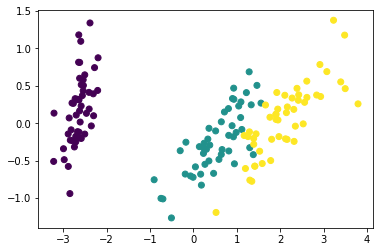

In [68]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

## LDA - Linear Discriminant Analysis

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [70]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

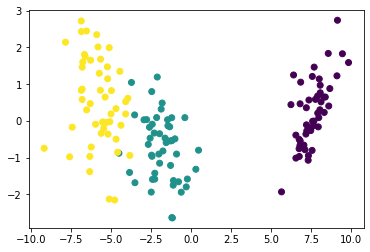

In [72]:
_ = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)

## t-SNE

Metoda pogodna isključivo za vizuelizaciju podataka

In [74]:
from sklearn.manifold import TSNE

In [83]:
# Testirati kombinacije parametara:
# * perplexity=30, n_iter=1000
# * perplexity=30, n_iter=250
# * perplexity=5, n_iter=1000
# * perplexity=150, n_iter=1000

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X)

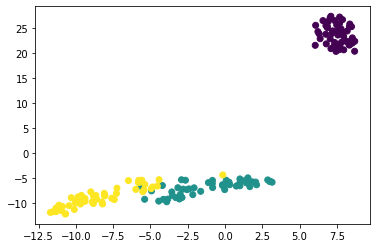

In [84]:
_ = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y)

# SVD - Singular Value Decomposition

In [85]:
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

In [90]:
svd = TruncatedSVD() # Izdvaja U komponentu iz X = U * sigma * V^T
X_svd = svd.fit_transform(X)

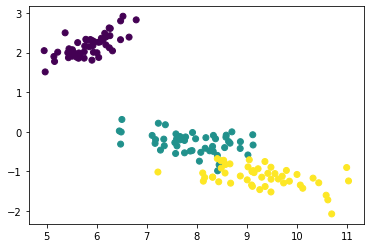

In [88]:
_ = plt.scatter(X_svd[:, 0], X_svd[:, 1], c = y)

In [92]:
X_svd_r = randomized_svd(X, n_components=2, random_state=0) # Izdvaja sve komponente SVD transformacije
[U, s, V_t] = X_svd_r

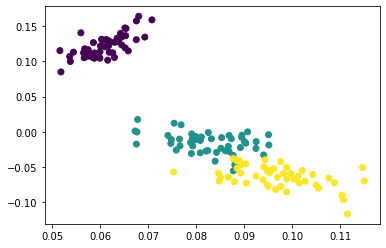

In [93]:
_ = plt.scatter(U[:, 0], U[:, 1], c = y) # Obratiti pažnju na skale na oba grafika rezultata SVD!